# STA220 Final Project: Investigation of Pricing, Brands, and Inventory in Clothing & Apparel at Dillard's Department Store

#### Alicia Alarie
#### Student ID: 916652377


This project will investigate clothing items offered at United States Department store _"Dillard's"_. The main questions to be investigated are:


* Are Men's and Women's clothing items are priced similarly for similar types of clothing items?

* What influences price of a clothing item the most- material, gender, or brand?

* What proportion of the inventory is for plus, petite, and regular sizes? Does this reflect the demand and demographics of the population?

* What proportion of the clothing inventory is menswear vs womenswear?

* Are most brands exclusively menswear or womenswear?


## The Data

The Dataset used for this project is all Men's and Women's clothing items sold online at the Dillard's website. The data includes 22669 items with 8941 Men's items and 13728 Women's items. The data was scraped using a web scraper and parsing HTML and stored in an sqlite database. The Dillard's department store was chosen due to it's large number and variety of items, accessibilty of data for scraping, and good organization of it's site for scraping. Dillard's has about 289 stores 29 states, primarily in the southern and western united states with most stores in Florida and Texas, taking in ~6 billion in revenue according to the company's website (https://careers.dillards.com/Careers/Information/history). 

The cell below reads the data from saved sqlite databases into a pandas data frame for analysis.

In [563]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import re
import requests
import requests_ftp
import requests_cache
requests_cache.install_cache('coll_cache')
import lxml
import plotnine as p9
import adjustText
from bs4 import BeautifulSoup
from collections import Counter
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import sqlalchemy as sqla
from adjustText import adjust_text

#create SQL engine
sqlite_file = 'Dillardswomen.sqlite'
womens_clothing = sqla.create_engine('sqlite:///' + sqlite_file)
sqlite_file = 'Dillardsmens.sqlite'
mens_clothing = sqla.create_engine('sqlite:///' + sqlite_file)

#Read data from SQL database to pandas data frame
db=pd.read_sql_query("select * from clothing",womens_clothing)
mens=pd.read_sql_query("select * from clothing",mens_clothing)

#Append Mens and Womens Clothing into the same dataframe
db=db.append(mens)


**Imputed Information**

The information that was chosen to be scraped included name of each item, price of each item, whether the item
was Mens or Womens, and the item description. From this information, the item category (shirt, pants, dress) and 
material was imputed by finding keywords for each item type in the description and name of the product. Whether 
the item was a Plus(Big & Tall) item, Petite, or Regular sized was also imputed from keywords in the name and 
description. 

The code below shows how each category and plus/petite classification was made. Clothing categories included: 
_accessories, blazer, jacket, jeans, pants, jumpsuit, dress, skirt, suit, swimwear, shirt, robe, and shorts._


In [564]:
#Add columns to the database for clothing type- jeans, shirt, blazer, jewelry, etc.
accessories=((db.description.str.contains('bag ')) | (db.description.str.contains('hat '))|
             (db.description.str.contains('purse '))|(db.description.str.contains('hair '))|
             (db.name.str.contains('Belt ')))
jeans=(db.description.str.contains('these jeans '))

pants=(db.description.str.contains('these pants '))

shirts=((db.description.str.contains('this shirt ')) | (db.description.str.contains('this blouse '))|
        (db.description.str.contains('this top '))|(db.description.str.contains('this tee')))

blazer=(db.description.str.contains('this blazer ')) 

jacket=(db.description.str.contains('this jacket '))|(db.description.str.contains('this coat '))

sweater=((db.description.str.contains('this sweater'))| (db.description.str.contains('this sweatshirt '))|
         (db.description.str.contains('this knit')))

jewelry=((db.description.str.contains('this bracelet')) | (db.description.str.contains('this necklace'))|
            (db.description.str.contains('these earring'))|(db.description.str.contains('this chain'))|
            (db.description.str.contains('this ring'))|(db.name.str.contains('Chain')))
            

swimwear=(db.description.str.contains('swim')) | (db.description.str.contains('bathing'))

dresses=(((db.description.str.contains('this dress')) | (db.description.str.contains('this gown'))|
          (db.name.str.contains('Gown'))) & (db.Womens==1))

skirt=(db.description.str.contains('this skirt features')) & (db.Womens==1)

suit=((db.description.str.contains('this suit '))|(db.description.str.contains('this skirt suit '))|
      (db.description.str.contains('this Tuxedo'))|(db.description.str.contains('this 2-piece tuxedo ')))

jumpsuit=(db.description.str.contains('this jumpsuit '))

robe=(db.description.str.contains('this robe '))

shorts=(db.description.str.contains('these shorts '))

plus=((db.description.str.contains('plus'))| (db.name.str.contains('Plus'))|(db.name.str.contains('Big'))|
      (db.description.str.contains('Big & Tall')))
petite=(db.description.str.contains('petite'))| (db.name.str.contains('Petite'))

db['category']='miscellaneous'
db.category[accessories]='accesories'
db.category[jewelry]='jewelry'
db.category[shirts]='shirt'
db.category[sweater]='sweater'
db.category[blazer]='blazer'
db.category[jacket]='jacket'
db.category[pants]='pants'
db.category[jeans]='jeans'
db.category[swimwear]='swimwear'
db.category[dresses]='dresses'
db.category[skirt]='skirt'
db.category[suit]='suit'
db.category[robe]='robe'
db.category[shorts]='shorts'
db.category[jumpsuit]='jumpsuit'

db['pluspetite']='regular'
db.pluspetite[plus]='plus'
db.pluspetite[petite]='petite'

db['gender']=''
db.gender[db.Mens==1]='Mens'
db.gender[db.Womens==1]='Womens'

db['pricerange']=np.around(db.price,decimals=-1)

C:\Users\alici\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alici\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alici\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alici\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value i

## Are Men and Womens Items Priced Similarly for the Same Clothing Categories?

The code below shows how the data was grouped by category and gender to find average price, standard deviation of price, and number of items per category and per gender. The pandas groupby functionality was used to do this. All items that did not have any items in a certain category were assigned NaN values using the numpy library. 

C:\Users\alici\Anaconda3\lib\site-packages\mizani\bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
C:\Users\alici\Anaconda3\lib\site-packages\mizani\bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
C:\Users\alici\Anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
C:\Users\alici\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


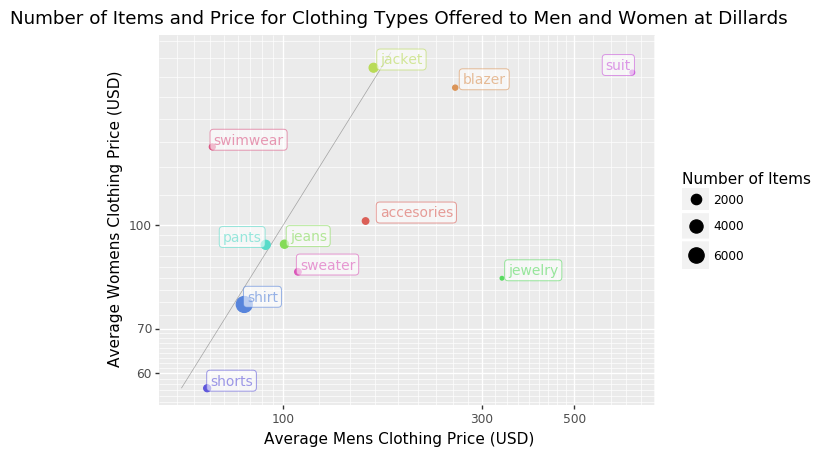

<ggplot: (-9223371902839630644)>

In [571]:
#Calcualte average and standard deviation of price for items 
#in the same category for men and womens items using groupby
avgcat=pd.DataFrame( db.groupby(['category','gender']).mean()).reset_index()
stdcat=pd.DataFrame( db.groupby(['category','gender']).std()).reset_index()
countcat=pd.DataFrame({'count': db.groupby(['category','gender']).size()}).reset_index()

#Organize by price per category of clothing
pricecat=pd.DataFrame(avgcat['category'])
pricecat['gender']=avgcat.gender
pricecat['avgprice']=avgcat.price
pricecat['stdprice']=stdcat.price
pricecat['numitems']=countcat['count']

#Assign items that do not have a price in a certain category/gender as NaN
pricecat = pricecat.append({'category':'dresses', 'gender':'Mens','avgprice':np.nan}, ignore_index=True,sort=True)
pricecat = pricecat.append({'category':'skirt', 'gender':'Mens','avgprice':np.nan}, ignore_index=True,sort=True)
pricecat = pricecat.append({'category':'jumpsuit', 'gender':'Mens','avgprice':np.nan}, ignore_index=True,sort=True)
pricecat = pricecat.append({'category':'robe', 'gender':'Womens','avgprice':np.nan}, ignore_index=True,sort=True)
pricecat=pricecat.sort_values('category').reset_index()#set_index('category')

#Sort Prices for Men's and Womens Clothes into two dataframes
prMen=pricecat[pricecat.gender=='Mens'].reset_index()
prWom=pricecat[pricecat.gender=='Womens'].reset_index()

#Reorganize data into new Data Frame with the price column replaced by 
#two price columns- one column for Mens prices, and one column for womens prices
prc=pd.DataFrame()
prc['category']=prWom['category']
prc['numitemsmens']=prMen['numitems']
prc['mensprice']=prMen['avgprice']
prc['womensprice']=prWom['avgprice']
prc['menspricerr']=prMen['stdprice']
prc['womenspricerr']=prWom['stdprice']
prc['numitemswomens']=prWom['numitems']
prc['numitems']=prWom['numitems']+prMen['numitems']

#Plot Mens vs Womens prices by clothing item type to see if there are any 
#outliers in price in any particular type of clothing. Also show the number items in each clothing type.
(p9.ggplot(data=prc,
           mapping=p9.aes(x='mensprice',y='womensprice',color='category',size='numitems'))
    + p9.geom_line(mapping=p9.aes(x='womensprice',y='womensprice'),inherit_aes=False,color='black',alpha=.3, size=.3)
    + p9.geom_point(show_legend={'color': False})
    + p9.labels.ggtitle('Number of Items and Price for Clothing Types Offered to Men and Women at Dillards')
    + p9.labels.ylab('Average Womens Clothing Price (USD)')
    + p9.labels.xlab('Average Mens Clothing Price (USD)')
    + p9.scale_color_discrete(guide=False)
    + p9.labs(size="Number of Items")
    + p9.geom_label(data=prc,mapping=p9.aes(label="category"),size=10,nudge_y=-8,nudge_x=-56,na_rm=True,alpha=.6,adjust_text={'expand_points':(1.05,1.02)})
    + p9.scales.scale_x_log10()
    + p9.scales.scale_y_log10()
    #+ p9.geom_errorbar(p9.aes(x="mensprice", ymin="womensprice-womenspricerr",ymax="womensprice+womenspricerr"),inherit_aes=False,alpha=.05,width=.05)
    #+ p9.geom_errorbarh(p9.aes(y="womensprice", xmin="mensprice-menspricerr",xmax="mensprice+menspricerr"),inherit_aes=False,alpha=.05,height=0.05)
    
)

The plot above shows that items are priced similarly for Mens and Womens clothing items of the same type. The plot shows Womens price vs Mens price as geometric mappings on the x and y axis. A line showing a relationship of exactly equal pricing is shown for reference. Items to the bottom right of the line are priced higher for men on average and items to the upper left of the line are priced higher for women than men on average. The number of items sold (inventory) for each clothing category is aesthetically mapped to the size of the point for that category. Items that have more inventory at the store are larger. The number of items sold at Dillards for each category roughly resembles the number of items for each category in a typical wardrobe- mostly shirts and pants, and a small number of suits, swimwear items, and jewelry. 

The biggest outliers are suits and jewelry. These items have large outliers that can be seen below by filtering for items greater than 1000 USD. This includes Mens wool suits, and Mens chains and bracelets. Mens blazers are also priced much higher than Women's blazers at an average of about 260 USD vs the womens average of about 160 USD. This could be due to differences in material or brand pricing. 

Most items are slightly higher priced for Men than Women with the exeption of swimwear, jackets, and pants. These items could be priced higher due to differences in style compared to mens equivalents, or more brands that sell at higher price points for women. 

In [572]:
#outliers in price for Mens items
db[db.price>1000]

name           brand  Womens  Mens   price  \
3786                 Heavy Cable Chain     James Avery       0     1  1150.0   
4262   Fishers of Men Ichthus Bracelet     James Avery       0     1  1600.0   
4593                Medium Spiga Chain     James Avery       0     1  1670.0   
4620  Classic Fit Windowpane Wool Suit  Hickey Freeman       0     1  1795.0   
4930       Classic Fit Solid Wool Suit  Hickey Freeman       0     1  1795.0   

                                            description category pluspetite  \
3786  FromJames Avery, theHeavy Cable Chain features...  jewelry    regular   
4262  From James Avery Jewelry, this bracelet featur...  jewelry    regular   
4593  FromJames Avery, theMedium Spiga Chain feature...  jewelry    regular   
4620  From Hickey Freeman, this suit features:window...     suit    regular   
4930  From Hickey Freeman, this suit features: Suit ...     suit    regular   

     gender  pricerange  
3786   Mens      1150.0  
4262   Mens      1600.0  
4593   Mens      1670.0  
4620   Mens      1800.0  
4930   Mens      1800.0

**Outliers and Price Range per Item Category**

The plot below shows the average price for each item category (shirt, pants, etc.) for Men and Women. The error bars show that the categories of Mens jewelry and suits have outliers as shown in the table above. The largest price range for an item appears for be for Mens chains, which can be obtained for anywhere from  22 USD to 1700 USD. Other than these two categories, the data looks to have no other significant outliers. 

C:\Users\alici\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_col : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\Users\alici\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_errorbar : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


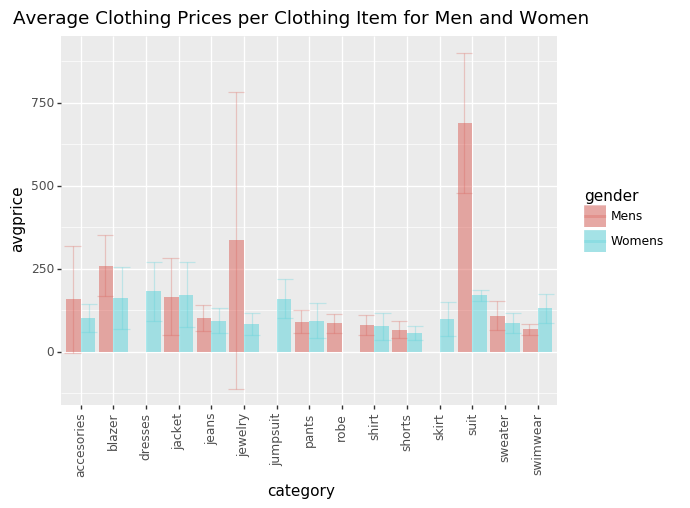

<ggplot: (-9223371902839807812)>

In [576]:
(p9.ggplot(data=pricecat,
           mapping=p9.aes(x='category',y='avgprice',fill='gender'))
    + p9.geom_col(alpha=.5,position="dodge")
    + p9.theme(axis_text_x = p9.element_text(angle=90))
    + p9.labels.ggtitle('Average Clothing Prices per Clothing Item for Men and Women')
    + p9.geom_errorbar(p9.aes(x="category", ymin="avgprice-stdprice",ymax="avgprice+stdprice",color="gender"),position="dodge",alpha=.3,width=1)
)

## What proportion of the inventory is for plus, petite, and regular sizes? Does this reflect the demand and demographics of the population?

The code below shows how the percentage of items for plus and petite sizes was calculated using groupby and size functions. The data was then stored in a new dataframe for plotting and is shown in the figure below. 

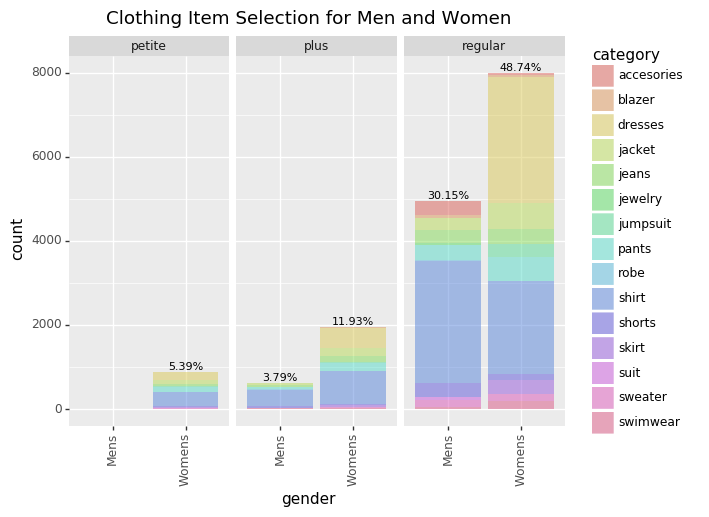

<ggplot: (-9223371902843815880)>

In [384]:
#Calculate number and percentage of items for men and women in plus and petite
numitems=pd.DataFrame({'count': db.groupby(['pluspetite','gender']).size()})
percentitems=np.round((numitems['count']/np.sum(numitems['count']))*100,2).reset_index()
numitems=numitems.reset_index()

#Reorganize data for plotting by gender, plus/petite?, number of items, and percentage of items
items=pd.DataFrame()
items['percentitems']=0
items.percentitems=np.array(percentitems['count'])
items['numitems']=0
items.numitems=np.array(numitems['count'])
items['gender']=0
items.gender=np.array(numitems['gender'])
items['pluspetite']=0
items.pluspetite=np.array(numitems['pluspetite'])

#Plot 
(p9.ggplot()
    + p9.geom_bar(data=db,mapping=p9.aes(x='gender',fill='category'),alpha=.5)
    + p9.theme(axis_text_x = p9.element_text(angle=90))
    + p9.facet_wrap("pluspetite")
    + p9.labels.ggtitle('Clothing Item Selection for Men and Women')
    + p9.geom_text(mapping=p9.aes(x='gender',y='numitems',label='percentitems'),data=items,
             size=8, va='bottom', format_string='{}%')
)

The plot above shows that the majority of inventory for clothing is for women at about 66% of items in the store. Only about 16% of items are for plus/ big & tall sizes, and 6% for petite sizes. The graph shows how this minimizes selection for those that don't fit into the regular size category. According to the Centers for Disease Control and Prevention (https://www.cdc.gov/nchs/fastats/obesity-overweight.htm), about 39.8% of Americans are classified as 'obease', meaning that many people may not be satisfied with selection of clothing at Dillard's, and that Dillard's may be missing an opportunity for sales to these people. The CDC also reports that the average height of females in the United States is 5'3.6" which is the height below which petite sizes fit better. This means that many customers in this category as well may not find a good selection and there may be more demand for these sizes. There are also no clothes sizes offered for men below an average height. This may be partially due to the cut of mens clothing versus womens clothing, making it easier to tailor mens clothing to a shorter length, as well as availability of tailoring for mens clothing from retailers.

## Are most brands exclusively menswear or womenswear?

The code below shows how the number of items per brand for men and women was calculated using groupby and size. Brands were filtered to look at the brands that sell at least 200 items at Dillards. Of these brands, the bar plot shows that most brands are womenswear only brands or menswear only brands and many larger brands that carry more items in the store such as Calvin Klein, Tommy Bahama, and Michael Kors carry both menswear and womenswear. 

C:\Users\alici\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\alici\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


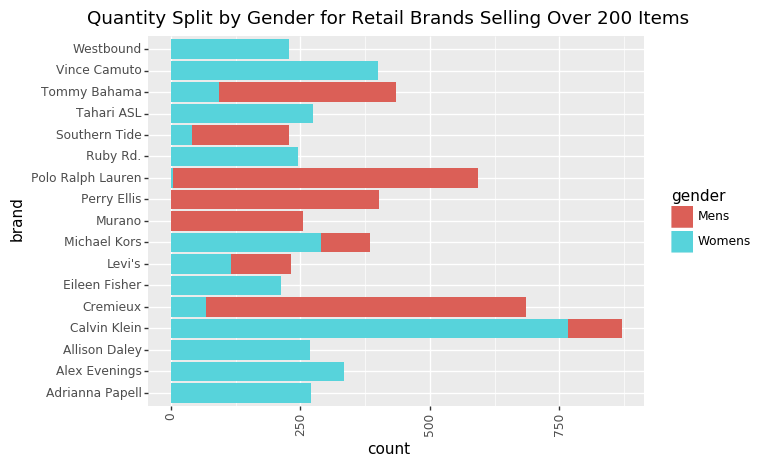

<ggplot: (-9223371902856812372)>

In [578]:
# Group and count data by brand for Mens and Womens clothing
perbrand=pd.DataFrame({'count' : db.groupby( ['brand'] ).size()}).reset_index()
perbrand=perbrand[perbrand['count']>200]

#Classify brand type as: mens, womens, or both
data=pd.DataFrame()
data['brandtype']=''
for brand in perbrand['brand']:
    branddata=db[db.brand==brand]
    branddata['brandtype']=''
    if branddata.Womens.any()==1 & branddata.Mens.any()==1:
        branddata.brandtype='Both'
    elif branddata.Womens.any()==1:
        branddata.brandtype='Womenswear'
    elif branddata.Mens.any()==1:
        branddata.brandtype='Menswear'
    data=data.append(branddata)

#plot
(p9.ggplot(data=data,
           mapping=p9.aes(x='brand',fill='gender'))
    + p9.geom_bar()
    #+ p9.facet_wrap("brand")
    + p9.theme(axis_text_x = p9.element_text(angle=90))
    + p9.coord_flip()
    + p9.labels.ggtitle('Quantity Split by Gender for Retail Brands Selling Over 200 Items')
)

## What influences price of a clothing item the most- material, gender, or brand?

The code below shows how the data was sorted by brand and gender. The average price was calcualted for men and women using groupby and mean. The number of item per brand was also calculated to give an idea of how big the brand is as well as the percentage of items within the category(pants) that are for women to show if the brand is primarily mens or womens. 

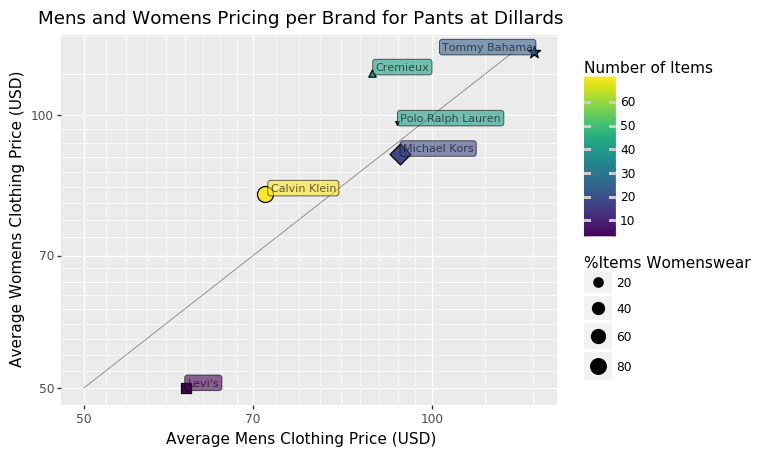

<ggplot: (-9223371902856235220)>

In [583]:
#Sort mens and womens pants data
jeansdata=data[data.category=='pants']
wjean=jeansdata[jeansdata.gender=='Womens']
mjean=jeansdata[jeansdata.gender=='Mens']

#Calculate average, standard deviation, and count for pants of each brand for men and women
avgj=pd.DataFrame( jeansdata.groupby(['brand','gender']).mean()).reset_index()
stdj=pd.DataFrame( jeansdata.groupby(['brand','gender']).std()).reset_index()
countj=pd.DataFrame({'count': jeansdata.groupby(['brand','gender']).size()}).reset_index()

#Store results in a new data frame
jeans=pd.DataFrame(avgj['brand'])
jeans['gender']=avgj.gender
jeans['avgprice']=avgj.price
jeans['stdprice']=stdj.price
jeans['numitems']=countj['count']

#sort the new data frame by mens and womens
prMen=jeans[jeans.gender=='Mens'].reset_index()
prWom=jeans[jeans.gender=='Womens'].reset_index()

#exclude brands that do not have both mens and womens items
mbrands=(prMen.brand=='Calvin Klein')| (prMen.brand=='Cremieux')|(prMen.brand=="Levi's") |(prMen.brand=='Michael Kors')|(prMen.brand=='Polo Ralph Lauren')| (prMen.brand=='Tommy Bahama')
wbrands=(prWom.brand=='Calvin Klein')| (prWom.brand=='Cremieux')|(prWom.brand=="Levi's") |(prWom.brand=='Michael Kors')|(prWom.brand=='Polo Ralph Lauren')| (prWom.brand=='Tommy Bahama')
prMen=prMen[mbrands]
prWom=prWom[wbrands]

#combine rows of data into final data frame for plotting
prc=[]
prc=pd.DataFrame()
prc['brand']=prWom['brand']
prc['mensprice']=np.array(prMen['avgprice'])
prc['womensprice']=prWom['avgprice']
prc['numitems']=np.array(prWom['numitems'])+np.array(prMen['numitems'])
prc['wompercentage']=(np.array(prWom['numitems'])/(np.array(prWom['numitems'])+np.array(prMen['numitems'])))*100

#plot Mens and Womens Pricing per Brand for Pants
(p9.ggplot(data=prc,
           mapping=p9.aes(x='mensprice',y='womensprice',shape='brand',fill='numitems',size='wompercentage'))
    + p9.geom_line(mapping=p9.aes(x='womensprice',y='womensprice'),inherit_aes=False,color='black',alpha=.5, size=.3)
    + p9.geom_point(show_legend={'shape': False})
    + p9.labels.ggtitle('Mens and Womens Pricing per Brand for Pants at Dillards')
    + p9.labels.ylab('Average Womens Clothing Price (USD)')
    + p9.labels.xlab('Average Mens Clothing Price (USD)')
    + p9.scale_color_discrete(guide=False)
    + p9.labs(size="%Items Womenswear",fill='Number of Items')
    + p9.geom_label(data=prc,mapping=p9.aes(label="brand"),size=8,nudge_y=-8,nudge_x=-56,na_rm=False,alpha=.6,adjust_text={'expand_points':(1.05,1.02)})
    + p9.scales.scale_x_log10()
    + p9.scales.scale_y_log10()
)

### Pricing per Brand

The plot above shows how mens and womens pants prices compare on average for different brands at Dillard's. The line shows where an exactly equal price for mens and womens items would lie. The size of each point is aesthetically mapped to percentage of womens pants sold for each brand to show which brands are primarily mens or womens, and the color is aesthetically mapped to the number of pants items sold by each brand. 

The plot shows that the brands with warmer tones (more items) sell their pants at a slightly higher price for women than men on average. Levi's stands out as a brand that prices womens products lower than men products for pants. The brand that prices pants the more for women than men on average at Dillard's is Crimieux, a french brand mostly focused on menswear that is Dillard licensed. 

### Pricing by Material

The code below shows how the data is classified into material type using the str.contains function. The shirt data is stored in a pandas data frame.

In [593]:
#Categorize shirt data by material as cottton, linen, polyester, or silk 
shirtdata=data[data.category=='shirt']
shirtdata['material']='other'
cotton=(shirtdata.description.str.contains('cotton'))
shirtdata.material[cotton]='cotton'
polyester=(shirtdata.description.str.contains('polyester'))
shirtdata.material[polyester]='polyester'
silk=(shirtdata.description.str.contains('silk'))
shirtdata.material[silk]='silk'
linen=(shirtdata.description.str.contains('linen'))
shirtdata.material[linen]='linen'


C:\Users\alici\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alici\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\alici\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/in

### What factors are most heavily weighted in predicting price?
The code below shows how the material types, gender and brands are assigned number codes for each of their discrete states so that scikitlearn's support vector machine application can run on it to predict price, given gender, brand, and material of a shirt. The SVM coefficients show the weight of each variable in predicting price.

In [594]:
X=pd.DataFrame()
X['gender']=shirtdata['gender']
X['brand']=shirtdata['brand']
X['material']=shirtdata['material']

cotton=X.material=='cotton'
X.material[cotton]=1
poly=X.material=='polyester'
X.material[poly]=2
linen=X.material=='linen'
X.material[linen]=3
silk=X.material=='silk'
X.material[silk]=4
other=X.material=='other'
X.material[other]=0

wom=X.gender=='Womens'
X.gender[wom]=1
men=X.gender=='Mens'
X.gender[men]=1
n=0

for brands in np.unique(shirtdata['brand']):
    br=X.brand==brands
    X.brand[br]=n
    n=n+1

y=shirtdata['price']


The code below shows the implementation of a support vector regression to predict price of a shirt given the material, brand, and gender that the shirt is marketed to. 

X=[1, 1, 1], Predicted=67.51243631188144


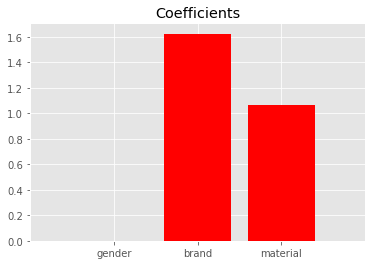

feature  linear coefficient
1     brand        1.625000e+00
2  material        1.062341e+00
0    gender        2.842171e-14

In [595]:
from sklearn.svm import SVR

n_samples, n_features = 100, 5
clf = SVR(C=1.0, epsilon=0.2,kernel='linear')
clf.fit(X, y)
SVR(epsilon=0.2)
coeff=clf.coef_

# define one new data instance
Xnew = [[1, 1, 1]]

# make a prediction
ynew = clf.predict(Xnew)

# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

# Extract feature importances
fi = pd.DataFrame({'feature':X.columns,
                   'linear coefficient': coeff[0]}).\
                    sort_values('linear coefficient', ascending = False)

# Plot the coefficients
plt.figure()
plt.title("Coefficients")
plt.bar(X.columns, coeff[0],
       color="r", align="center")

#plt.xticks(range(X2.shape[1]),range(X2.shape[1]))
plt.xlim([-1, X.shape[1]])
plt.show()

# Display
fi.head()

The coefficients of the SVM model above show that the most weight is on brand of a shirt in determining how expensive it will be. The model also shows that material is an important predictive factor. The model does not show correlation to whether the shirt is made for men or women in predicting price. This agrees with the plots from above of mens price vs womens price for shirts by brand as most brands had priced their shirts similarly between men and women.

### Is material, brand, or price a factor in determining whether the shirt is most likely to be Womens or Wens?
The code below shows how the data is reorganized to make the prediction variable gender and see how material, brand, and price influence what gender a shirt is classified as. The ExtraTreesClassifier from scikitlearn is then used to find the most important features of the model and plot feature importances for each predictor variable. 

Feature ranking:
1. feature 1 (0.587610)
2. feature 2 (0.213396)
3. feature 0 (0.198994)


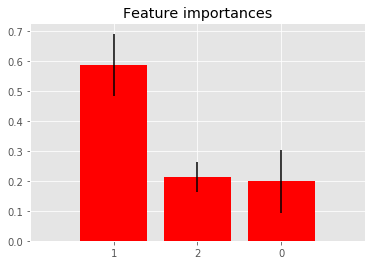

feature  importance
1     brand    0.587610
2     price    0.213396
0  material    0.198994

In [589]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

#create dataframe for gender as the prediciton and material, brand, and price as predictors
y2=shirtdata['gender']
X2=pd.DataFrame()
X2['material']=X['material']
X2['brand']=X['brand']
X2['price']=y

#set aside part of data for training
X2train=X2[:1200]
y2train=y2[:1200]

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=5,
                              random_state=0)

forest.fit(X2train, y2train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X2.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(X2.columns, importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(X2.columns, indices)
plt.xlim([-1, X2.shape[1]])
plt.show()

# Extract feature importances
fi = pd.DataFrame({'feature':X2.columns,
                   'importance': forest.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head()

The plot above shows that brand is the most significant factor in gender of a shirt. This makes sense as we saw above that some brands carry more womens items than mens items. Price and material are also features of the model meaninig they have a smaller importance in differentiating womens and mens shirts.

## Conclusions

Overall Womens and Mens clothing is priced similarly judging from the sample of clothing at Dillard's department store. However some items such as swimwear are more expensive for women, and items such as suits can be more expensive for men. Some brands also have prices that are skewed on average hgiher for women (such as Calvin Klein shirts) or for men (such as Levi's shirts). The difference in price by gender was not determined to be significant by an SVM model in scikitlearn. And a Random Forest model determined that brand was the most important feature in classifying mens and womens items.  